In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# n_points points from the sin(2*pi*x)
def Sine_func(x): 
    return np.sin(2*np.pi*x)

In [3]:
n_points = 100 # Number of points
x = np.linspace(0, 1, num=n_points)# Sample n_points

Text(0, 0.5, 'y')

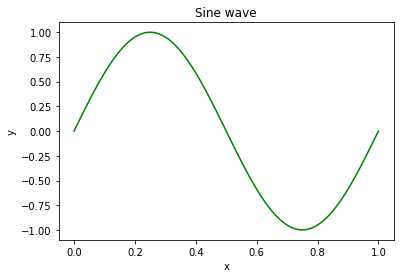

In [4]:
y = Sine_func(x)# Create sine wave of sampled n_points
import matplotlib.pyplot as plt
plt.figure
plt.plot(x, y, 'g-')
plt.title('Sine wave')
plt.xlabel('x')
plt.ylabel('y')

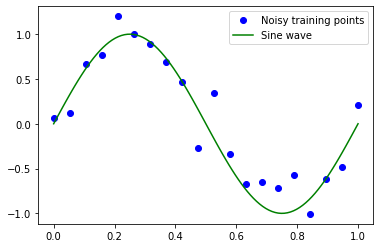

In [5]:
sample_points = 20

x_train = np.linspace(0, 1, num=sample_points)
y_train = Sine_func(x_train)+0.2*np.random.normal(0,1,sample_points) #Add noise of mean 0 and standard deviation 1 

# Plot
import matplotlib.pyplot as plt
plt.figure
plt.plot(x_train, y_train, 'bo',x, y, 'g-')
plt.legend(('Noisy training points', 'Sine wave'))

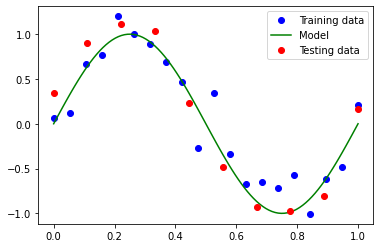

In [6]:
#Check the output of new data points
n = 10
x_test = np.linspace(0, 1, num=n)
eta = 0.2*np.random.normal(0,1,n) #Add noise of mean 0 and standard deviation 1
y_test = Sine_func(x_test)+eta 

plt.figure
plt.plot(x_train, y_train, 'bo',x, y, 'g-',x_test, y_test, 'ro')
plt.legend(('Training data', 'Model', 'Testing data'))

In [7]:
#Fit a 3rd degree polynomial to estimate the probability distribution of the target variable
#y' = a+bx+cx^2+dx^3

In [8]:
# # Fit by cubic polynomial
n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)

In [9]:

x = np.array([1, 2, 3, 5])
N = 3
np.vander(x, N+1, increasing = True)

array([[  1,   1,   1,   1],
       [  1,   2,   4,   8],
       [  1,   3,   9,  27],
       [  1,   5,  25, 125]])

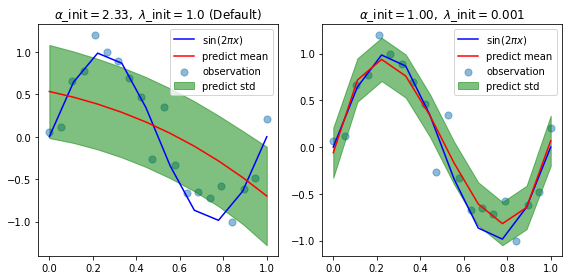

In [10]:
from sklearn.linear_model import BayesianRidge

# Plot the true and predicted curves with log marginal likelihood (L)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.]  # Default values
    elif i == 1:
        init = [1., 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1]) #lambda_init = regularization parameter
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)
  
    ax.plot(x_test, Sine_func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(x_test, ymean-ystd, ymean+ystd,
                    color="green", alpha=0.5, label="predict std")
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(
            init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)

plt.tight_layout()
plt.show()